#### Primero importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.- Recopilación de Datos

he recogido este dataset aqui: https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction?select=diabetes_risk_prediction_dataset.csv

In [2]:
df = pd.read_csv('../../2.- Datasets/diabetes_risk_prediction.csv', index_col=0)

In [3]:
df_copy = df.copy()

## **2.- Exploración y Análisis de Datos**

In [4]:
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,,,,,,,,,,,,,,,,
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
df.describe()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 40 to 42
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              520 non-null    object
 1   Polyuria            520 non-null    object
 2   Polydipsia          520 non-null    object
 3   sudden weight loss  520 non-null    object
 4   weakness            520 non-null    object
 5   Polyphagia          520 non-null    object
 6   Genital thrush      520 non-null    object
 7   visual blurring     520 non-null    object
 8   Itching             520 non-null    object
 9   Irritability        520 non-null    object
 10  delayed healing     520 non-null    object
 11  partial paresis     520 non-null    object
 12  muscle stiffness    520 non-null    object
 13  Alopecia            520 non-null    object
 14  Obesity             520 non-null    object
 15  class               520 non-null    object
dtypes: object(16)
memory usage: 69.

In [7]:
df.shape

(520, 16)

In [8]:
# Reemplazamos'Negative' con 0 y 'Positive' con 1 en la columna 'class'
df['class'] = df['class'].map({'Negative': 0, 'Positive': 1})

## 3.- División de Datos

In [9]:
x = df.drop('class', axis=1)  # características
y = df['class']  # etiquetas

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 4.- Preprocesamiento de datos

#### Vamos a aplicar este pipeline para hacer esto mucho mas sencillo

#### Este codigo se puede copiar y pegar

In [11]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Definimos las columnas numéricas y categóricas para cada
numeric_features = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

# Creamos transformers para imputación y escala
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creamos transformer para codificación de variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creamos un preprocesador que aplique los transformers apropiados a las columnas correctas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creamos el pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [12]:
# Aplicamos el pipeline a x_train y x_test
x_train_transformed = pipeline.fit_transform(x_train)
x_test_transformed = pipeline.transform(x_test)

In [13]:
# Ya esta, pero esta en formato array
x_train_transformed

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [14]:
# Vamos a transformarlo en un dataframe
x_train = pd.DataFrame(x_train_transformed, columns=list(pd.get_dummies(x_train)), index=x_train.index)

In [15]:
x_train.head()

,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
Age,,,,,,,,,,,,,,,,,,,,,
53,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
41,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
54,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
50,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
38,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [16]:
# Hacemos lo mismo con x_test_transformed
x_test = pd.DataFrame(x_test_transformed, columns=list(pd.get_dummies(x_test)), index=x_test.index)

In [17]:
x_test.head()

,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
Age,,,,,,,,,,,,,,,,,,,,,
72,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
40,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
57,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
41,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


## 5.- Entrenamiento

In [18]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()

modelo.fit(x_train, y_train)

LogisticRegression()

In [19]:
# Hacemos predicciones en el conjunto de prueba
y_pred = modelo.predict(x_test)

In [20]:
y_pred[0:5]

array([0, 1, 1, 1, 1], dtype=int64)

## 6.- Evaluación

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

###  Matriz de confusión

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

Matriz de Confusión:
 [[28  5]
 [ 3 68]]


### Precisión

In [25]:
precision = precision_score(y_test, y_pred)
print("Precisión:", precision)

Precisión: 0.9315068493150684


### Recall

In [26]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.9577464788732394


### F1 score

In [27]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9444444444444444


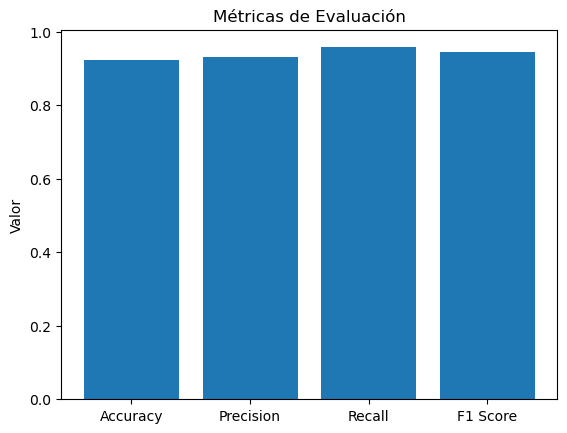

In [30]:
import matplotlib.pyplot as plt

# Crear una barra para cada métrica
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

plt.bar(metrics, values)
plt.ylabel('Valor')
plt.title('Métricas de Evaluación')
plt.show()

In [31]:
# Creamos un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'F1 Score': [f1_score(y_test, y_pred)]
})

# Imprimimos la tabla de métricas
print(metrics_df)

   Accuracy  Precision    Recall  F1 Score
0  0.923077   0.931507  0.957746  0.944444


### Curva de ROC

In [28]:
proba = modelo.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba)
roc_auc = roc_auc_score(y_test, proba)

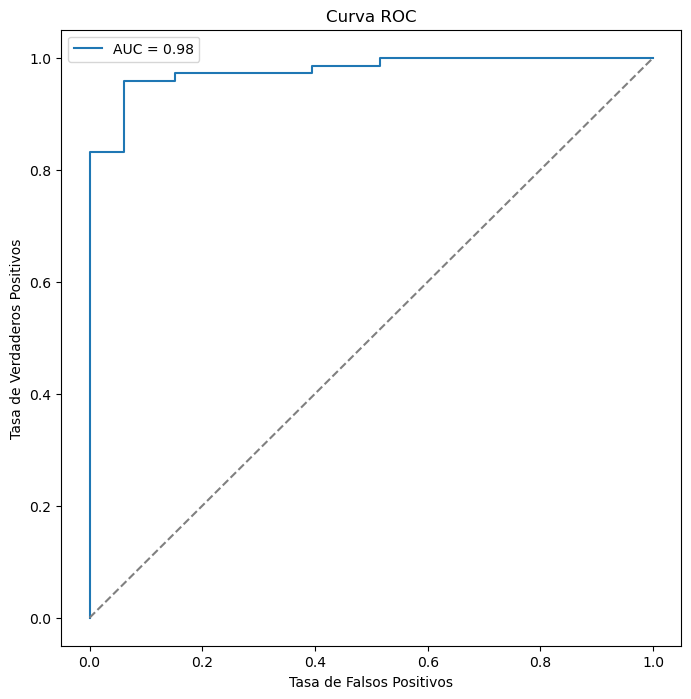

In [29]:
# Graficar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()